<a href="https://colab.research.google.com/github/Hansol03/PyTorch-Wikidocs-/blob/main/Pytorch%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9E%85%EB%AC%B8_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**04 로지스틱 회귀**

In [ ]:
# 2. 시그모이드 함수 
%matplotlib inline 
import numpy as np # 넘파이 사용 
import matplotlib.pyplot as plt 

In [ ]:
def sigmoid(x): # 시그모이드 함수 정의 
    return 1/(1+np.exp(-x)) 

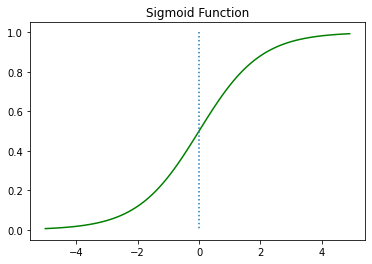

In [ ]:
# 1. W가 1이고 b가 0인 그래프 
x = np.arange(-5.0, 5.0, 0.1) 
y = sigmoid(x) 

plt.plot(x, y, 'g') 
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가 
plt.title('Sigmoid Function') 
plt.show()

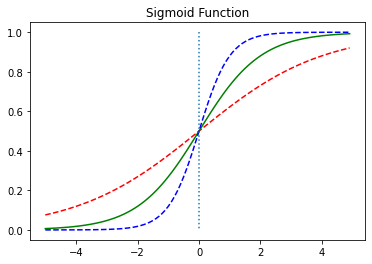

In [ ]:
# 2. W값의 변화에 따른 경사도의 변화 
x = np.arange(-5.0, 5.0, 0.1) 
y1 = sigmoid(0.5*x) 
y2 = sigmoid(x) 
y3 = sigmoid(2*x) 

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때 
plt.plot(x, y2, 'g') # W의 값이 1일때 
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때 
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가 
plt.title('Sigmoid Function')  
plt.show()

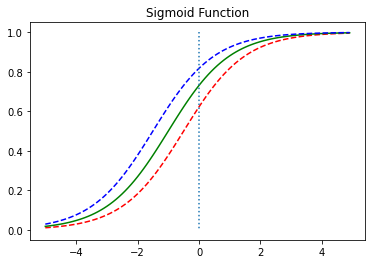

In [ ]:
# 3. b값의 변화에 따른 좌,우 이동 
x = np.arange(-5.0, 5.0, 0.1) 
y1 = sigmoid(x+0.5) 
y2 = sigmoid(x+1) 
y3 = sigmoid(x+1.5) 

plt.plot(x, y1, 'r', linestyle='--') # x+ 0.5 
plt.plot(x, y2, 'g') # x + 1 
plt.plot(x, y3, 'b', linestyle = '--') # x + 1.5
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가 
plt.title('Sigmoid Function') 
plt.show()

In [ ]:
# 4. 파이토치로 로지스틱 회귀 구현하기 
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]] 
y_data = [[0], [0], [0], [1],[1],[1]] 
x_train = torch.FloatTensor(x_data) 
y_train = torch.FloatTensor(y_data) 

In [ ]:
print(x_train.shape) 
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2,1), requires_grad=True) # 크기는 2 x 1 
b = torch.zeros(1, requires_grad=True)

In [ ]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W)+b))) 

In [ ]:
print(hypothesis) #예측 값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [ ]:
print(hypothesis) 
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [ ]:
-(y_train[0]*torch.log(hypothesis[0]) + 
  (1-y_train[0]) * torch.log(1-hypothesis[0])) 

tensor([0.6931], grad_fn=<NegBackward0>)

In [ ]:
losses = -(y_train * torch.log(hypothesis) + 
           (1-y_train) * torch.log(1 - hypothesis)) 
print(losses) 

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [ ]:
cost = losses.mean() 
print(cost) 

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
F.binary_cross_entropy(hypothesis, y_train) 

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]] 
y_data = [[0], [0], [0], [1], [1], [1]] 
x_train = torch.FloatTensor(x_data) 
y_train = torch.FloatTensor(y_data) 

In [ ]:
# 모델 초기화 
W = torch.zeros((2,1), requires_grad=True) 
b = torch.zeros(1, requires_grad=True) 
# optimizer 설정 
optimizer = optim.SGD([W, b], lr=1) 

nb_epochs = 1000
for epoch in range(nb_epochs + 1): 

    # Cost 계산 
    hypothesis = torch.sigmoid(x_train.matmul(W)+b) 
    cost = -(y_train * torch.log(hypothesis)+
             (1-y_train) * torch.log(1-hypothesis)).mean() 

    # cost로 H(x) 개선 
    optimizer.zero_grad() 
    cost.backward() 
    optimizer.step() 

    # 100번마다 로그 출력 
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item() 
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) +b) 
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5]) 
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


####**02. nn.Module로 구현하는 로지스틱 회귀**

In [ ]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]] 
y_data = [[0], [0], [0], [1], [1], [1]] 
x_train = torch.FloatTensor(x_data) 
y_train = torch.FloatTensor(y_data) 

In [ ]:
model = nn.Sequential(
    nn.Linear(2,1), #input_dim =2, output_dim=1 
    nn.Sigmoid() #출력은 시그모이드 함수를 거친다
)

In [ ]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
# optimizer 설정 
optimizer = optim.SGD(model.parameters(), lr=1) 

nb_epochs = 1000
for epoch in range(nb_epochs +1): 

    # H(x) 계산 
    hypothesis = model(x_train) 

    # cost 계산 
    cost = F.binary_cross_entropy(hypothesis, y_train) 

    # cost로 H(x) 개선 
    optimizer.zero_grad() 
    cost.backward() 
    optimizer.step() 

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주

        correct_prediction = prediction.float() == y_train #실제값과 일치하는 경우만 True로 간주

        accuracy = correct_prediction.sum().item()/len(correct_prediction) #정확도를 계산

        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( #각각 epoch마다 정확도 출력
                                                                     epoch, nb_epochs, cost.item(), accuracy*100)) 


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614851 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [ ]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


####**03.클래스로 파이토치 모델 구현하기**

In [ ]:
# 2. 로지스틱 회귀 클래스로 구현하기
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data) 
y_train = torch.FloatTensor(y_data) 

In [ ]:
class BinaryClassifier(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.linear = nn.Linear(2,1) 
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x): 
        return self.sigmoid(self.linear(x) )

In [ ]:
model = BinaryClassifier()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1) 

nb_epochs = 1000 
for epoch in range(nb_epochs +1):

    hypothesis = model(x_train)

    cost = F.binary_cross_entropy(hypothesis, y_train) 

    optimizer.zero_grad() 
    cost.backward() 
    optimizer.step() 

    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train 
        accuracy = correct_prediction.sum().item()/len(correct_prediction) 

        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614851 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [ ]:
# 03.소프트맥스 회귀의 비용 함수 구현하기
import torch
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
z = torch.FloatTensor([1,2,3]) 

In [ ]:
hypothesis = F.softmax(z, dim=0) 
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum()

tensor(1.)

In [ ]:
z = torch.rand(3,5,requires_grad=True)

In [ ]:
hypothesis = F.softmax(z, dim=1) 
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [ ]:
y = torch.randint(5, (3,)).long() 
print(y)

tensor([3, 1, 2])


In [ ]:
# 모든 원소가 0의 값을 가진 3x5 텐서 생성 
y_one_hot = torch.zeros_like(hypothesis) 
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [ ]:
print(y.unsqueeze(1))

tensor([[3],
        [1],
        [2]])


In [ ]:
print(y_one_hot)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])


In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.5430, grad_fn=<MeanBackward0>)


In [ ]:
# 2.파이토치로 소프트맥스의 비용 함수 구현하기(하이-레벨)

# Low level 
torch.log(F.softmax(z, dim=1)) 

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [ ]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [ ]:
# Low level
# 첫번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.5430, grad_fn=<MeanBackward0>)

In [ ]:
# 두 번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.5430, grad_fn=<MeanBackward0>)

In [ ]:
# High level
# 세번쨰 수식
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.5430, grad_fn=<NllLossBackward0>)

In [ ]:
# 네번째 수식
F.cross_entropy(z, y)

tensor(1.5430, grad_fn=<NllLossBackward0>)

####**04.소프트맥스 회귀 구현하기**

In [ ]:
import torch
import torch.nn as n 
import torch.nn.functional as F 
import torch.optim as optim 

torch.manual_seed(1)

In [ ]:
x_train = [[1,2,1,1],
           [2,1,3,2],
           [3,1,3,4],
           [4,1,5,5],
           [1,7,5,5],
           [1,2,5,6],
           [1,6,6,6],
           [1,7,7,7]] 
y_train = [2,2,2,1,1,1,0,0]
x_train = torch.FloatTensor(x_train) 
y_train = torch.LongTensor(y_train) 

In [ ]:
# 1.소프트맥스 회귀 구현하기(로우-레벨)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [ ]:
y_one_hot = torch.zeros(8,3) 
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [ ]:
# 모델 초기화
W = torch.zeros((4,3), requires_grad=True) 
b = torch.zeros(1, requires_grad=True) 
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs +1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [ ]:
# 2. 소프트맥스 회귀 구현하기(하이-레벨)
# 모델 초기화
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros(1, requires_grad= True) 
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1) 

nb_epochs = 1000
for epoch in range(nb_epochs +1): 

    # Cost 계산 
    z = x_train.matmul(W) + b 
    cost = F.cross_entropy(z, y_train) 

    # cost로 H(x) 개선 
    optimizer.zero_grad() 
    cost.backward() 
    optimizer.step() 

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:6d}/{} Cost:{:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch      0/1000 Cost:1.098612
Epoch    100/1000 Cost:0.761050
Epoch    200/1000 Cost:0.689991
Epoch    300/1000 Cost:0.643229
Epoch    400/1000 Cost:0.604117
Epoch    500/1000 Cost:0.568255
Epoch    600/1000 Cost:0.533922
Epoch    700/1000 Cost:0.500291
Epoch    800/1000 Cost:0.466908
Epoch    900/1000 Cost:0.433507
Epoch   1000/1000 Cost:0.399962


In [ ]:
# 3.소프트맥스 회귀 nn.Module로 구현하기
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3. 
model = nn.Linear(4,3)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1): 

    # H(x) 계산 
    prediction = model(x_train) 

    # cost 계산 
    cost = F.cross_entropy(prediction, y_train) 

    # cost로 H(x) 개선 
    optimizer.zero_grad() 
    cost.backward() 
    optimizer.step() 

    # 20번마다 로그 출력
    if epoch % 100 ==0:
        print('Epoch {:4d}/{} Cost: {: .6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost:  1.616785
Epoch  100/1000 Cost:  0.658891
Epoch  200/1000 Cost:  0.573443
Epoch  300/1000 Cost:  0.518151
Epoch  400/1000 Cost:  0.473265
Epoch  500/1000 Cost:  0.433516
Epoch  600/1000 Cost:  0.396563
Epoch  700/1000 Cost:  0.360914
Epoch  800/1000 Cost:  0.325392
Epoch  900/1000 Cost:  0.289178
Epoch 1000/1000 Cost:  0.254148


In [ ]:
# 4. 소프트맥스 회귀 클래스로 구현하기
class SoftmaxClassifierModel(nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.linear = nn.Linear(4, 3) # Output이 3! 

    def forward(self, x): 
        return self.linear(x) 


In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1) 

nb_epochs = 1000
for epoch in range(nb_epochs +1): 

    # H(x) 계산
    prediction = model(x_train) 

    # cost 계산
    cost = F.cross_entropy(prediction, y_train) 

    # cost로 H(x) 개선선 
    optimizer.zero_grad() 
    cost.backward() 
    optimizer.step() 

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


####**05. 소프트맥스 회귀로 MNIST 데이터 분류하기**

In [ ]:
import torch 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader 
import torch.nn as nn 
import matplotlib.pyplot as plt 
import random 

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면, True, 아니라면 False를 리턴 
device = torch.device('cuda' if USE_CUDA else 'cpu') # GPU 사용 가능하면 사용하고 아니면 CPU사용
print('다음 기기로 학습합니다:', device)

다음 기기로 학습합니다: cuda


In [ ]:
# for reproducibility 
random.seed(777) 
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# hyperparameters 
training_epochs = 15
batch_size = 100 

In [ ]:
# 4. MNIST 분류기 구현하기 
# MNIST dataset 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True, 
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False, 
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
# dataset loader 
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, #배치 크기는 100
                         shuffle = True,
                         drop_last = True)

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias = True).to(device) 

In [ ]:
# 비용 함수와 옵티마이저 정의 
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음 
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함 
    avg_cost = 0
    total_batch = len(data_loader) 

    for X, Y in data_loader: 
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다 
        X = X.view(-1, 28*28).to(device) 
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0~9의 정수 
        Y = Y.to(device) 

        optimizer.zero_grad()
        hypothesis = linear(X) 
        cost = criterion(hypothesis, Y) 
        cost.backward() 
        optimizer.step() 

        avg_cost += cost/ total_batch 
    
    print('Epoch:', '%04d' % (epoch +1), 'cost =', '{:.9f}'.format(avg_cost)) 

print('Learning finished') 


Epoch: 0001 cost = 0.535701573
Epoch: 0002 cost = 0.359403163
Epoch: 0003 cost = 0.331129968
Epoch: 0004 cost = 0.316610813
Epoch: 0005 cost = 0.307287782
Epoch: 0006 cost = 0.300151169
Epoch: 0007 cost = 0.295128852
Epoch: 0008 cost = 0.290526152
Epoch: 0009 cost = 0.287431389
Epoch: 0010 cost = 0.284428835
Epoch: 0011 cost = 0.281726062
Epoch: 0012 cost = 0.279582173
Epoch: 0013 cost = 0.277621865
Epoch: 0014 cost = 0.275999904
Epoch: 0015 cost = 0.274319857
Learning finished


Accuracy: 0.8833000063896179
Label:  5
Prediction:  8


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


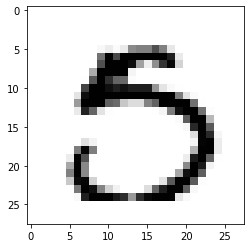

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다. 
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다 
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device) 
    Y_test = mnist_test.test_labels.to(device) 

    prediction = linear(X_test) 
    correct_prediction = torch.argmax(prediction, 1) == Y_test 
    accuracy = correct_prediction.float().mean() 
    print('Accuracy:', accuracy.item()) 

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을해본다 
    r = random.randint(0, len(mnist_test) -1) 
    X_single_data = mnist_test.test_data[r:r +1].view(-1, 28*28).float().to(device) 
    Y_single_data = mnist_test.test_labels[r:r +1].to(device) 

    print('Label: ', Y_single_data.item()) 
    single_prediction = linear(X_single_data) 
    print('Prediction: ', torch.argmax(single_prediction, 1).item()) 

    plt.imshow(mnist_test.test_data[r:r +1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()